In [1]:
from utils.binaries import *
from utils.plotting import *
from utils.Auger.SD.SdHisto import *

16:46:04 (   +1.1s) [INFO   ] -- import logging
16:46:04 (  +159ms) [INFO   ] -- import numpy as np
16:46:04 (   +10ms) [INFO   ] -- import uncertainties
16:46:04 (  +361ms) [INFO   ] -- import pandas as pd
16:46:04 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
16:46:04 (    +3ms) [INFO   ] -- import binaries.tools as tools
16:46:05 (  +400ms) [INFO   ] -- import matplotlib.pyplot as plt
16:46:05 (  +528ms) [INFO   ] -- import seaborn as so
16:46:05 (    +2ms) [INFO   ] -- import plotting.tools as plot
16:46:05 (   +14ms) [DEBUG  ] -- font size set to 9.5
16:46:05 (    +1ms) [DEBUG  ] -- label size set to 13.0
16:46:05 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
16:46:05 (    +0ms) [DEBUG  ] -- markersize set to 2.0
16:46:05 (    +1ms) [DEBUG  ] -- usetex set to False
16:46:05 (   +26ms) [INFO   ] -- set MONI_PATH = '/cr/work/filip/monit_and_sd/'
16:46:05 (    +1ms) [INFO   ] -- set HIST_PATH = '/cr/work/filip/monit_and_sd/'
16:46:05 (    +1ms) [INFO   ]

In [5]:
peak_histos_before = read_histos('/cr/data01/filip/Data/muonAcquisitionII/T3_before/peak.txt')
peak_histos_after = read_histos('/cr/data01/filip/Data/muonAcquisitionII/T3_after/peak.txt')

In [34]:
mips_before = {
    943: {},
    944: {},
    949: {},
    954: {},
}

mips_after = {
    943: {},
    944: {},
    949: {},
    954: {},
}

for event in peak_histos_before:
    try:
        if event['timestamp'] < 1737730078: raise KeyError
        histo = SdHisto(peak=event['data'], pmt_mask=[0,0,0,1])
        mips_before[event['id']][event['timestamp']] = histo.get_peak('peak')[-1][1]
    except KeyError: continue 

for event in peak_histos_after:
    try:
        histo = SdHisto(peak=event['data'], pmt_mask=[0,0,0,1])
        mips_after[event['id']][event['timestamp']] = histo.get_peak('peak')[-1][1]
    except KeyError: continue

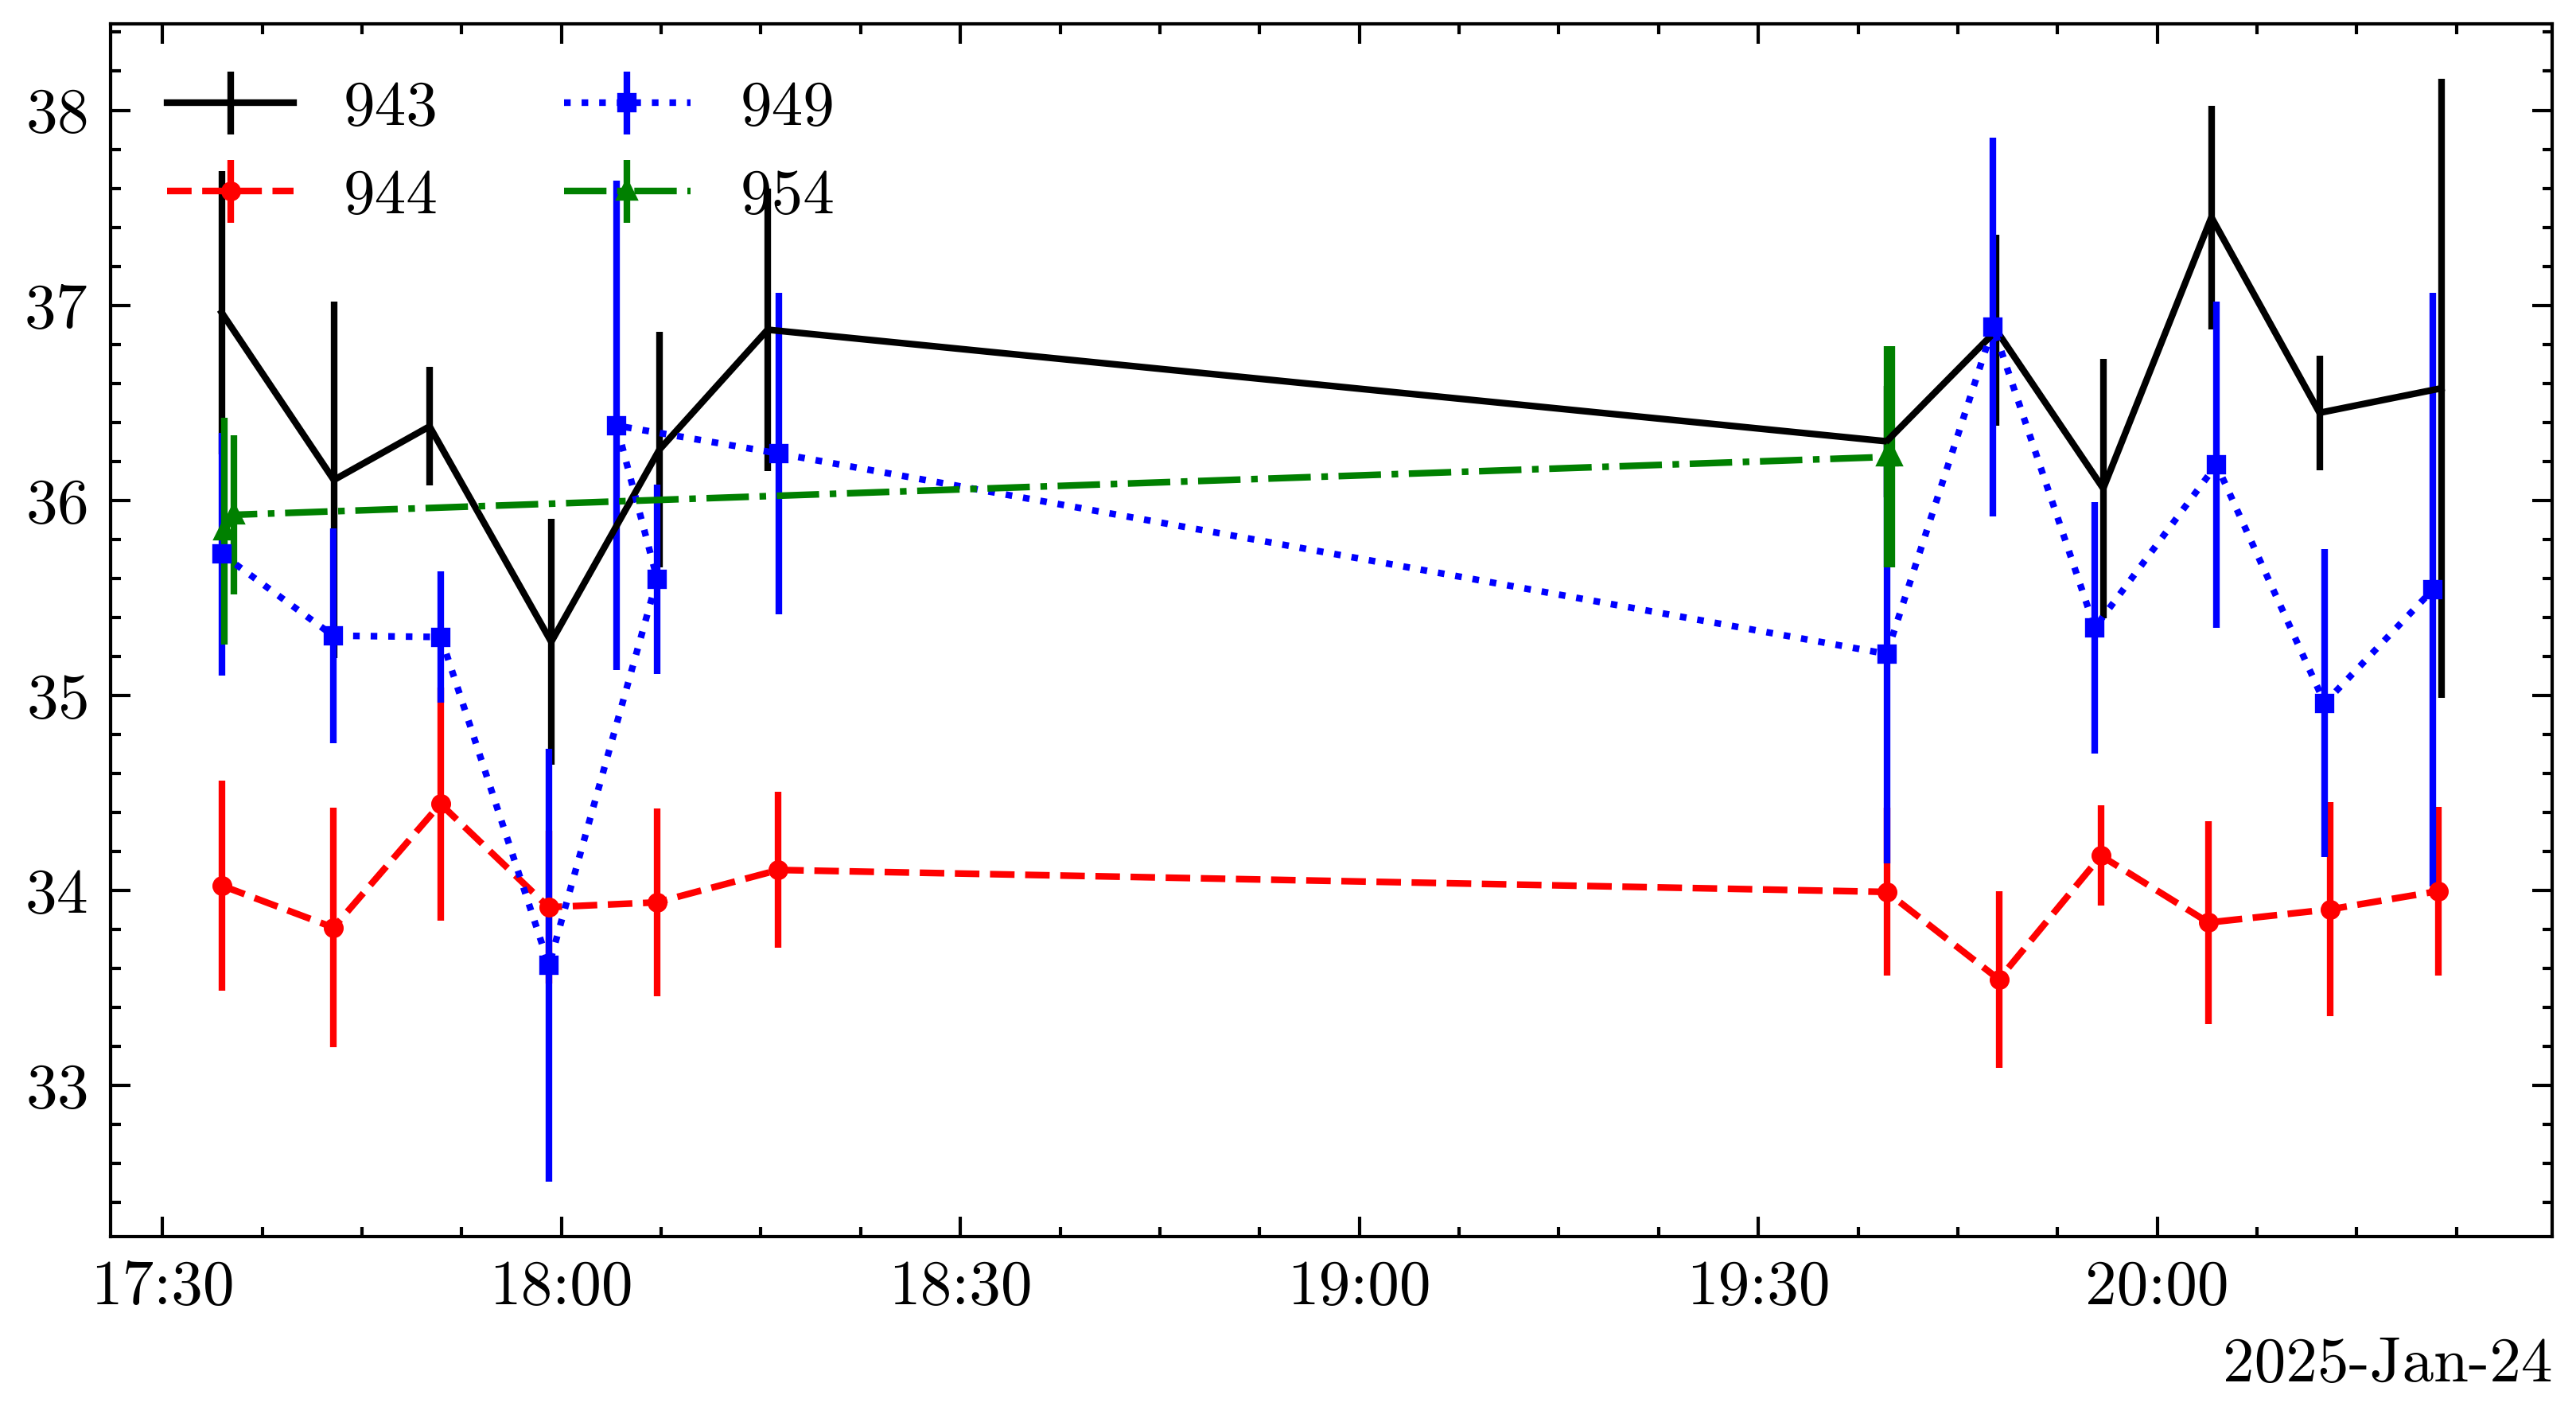

In [37]:
mip = {}
for station in [943, 944, 949, 954]:
        t = list(mips_before[station].keys())
        y = [x.n for x in mips_before[station].values()]
        s = [x.std_dev for x in mips_before[station].values()]

        t += list(mips_after[station].keys())
        y += [x.n for x in mips_after[station].values()]
        s += [x.std_dev for x in mips_after[station].values()]
        mip[station] = uncertainties.ufloat(np.mean(y), np.sqrt(np.sum(np.array(s)**2))/len(s))

        plt.errorbar(plot.to_datetime(t), y, s, label=station)

plt.legend(ncol=2)
plot.apply_datetime_format(plt.gca())

In [39]:
tools.pickle_save("/cr/data01/filip/Data/muonAcquisitionII/mip_peak.pkl", mip)